In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

from gpmap.utils import hamming_distance
from collections import Counter
import networkx as nx
from networkx.readwrite import json_graph

In [4]:
with open("full-predictions/results/actual-walks-7-2.pickle", "rb") as f:
    a = pickle.load(f)
    a = a[0] 
    
# Annoying first sequence
for i in range(len(a)):
    for j in range(len(a[i])):
        a[i][j] = "".join(a[i][j])

a = np.array(a)

with open("full-predictions/results/predicted-walks-7-2.pickle", "rb") as f:
    p = pickle.load(f)
    p = p[0]
    
# Annoying first sequence
for i in range(len(p)):
    for j in range(len(p[i])):
        p[i][j] = "".join(p[i][j])
        
p = np.array(p)
print(np.unique(a[:,7]), np.unique(p[:,7]))

['VWPEAFCMEARNMMW' 'VWPEAFCMYARNMMW' 'VWPEEFCMEARNMMW' 'VWPEEFCMYARNMMW'
 'VWPPAFCMEARNMMW' 'VWPPEFCMEARNMMW' 'VWPPEFCMYARNMMW'] ['VWPEAFCMEARNMMW' 'VWPEAFCMYARNMMW' 'VWPEEFCMEARNMMW' 'VWPEEFCMYARNMMW'
 'VWPPAFCMEARNMMW' 'VWPPEFCMEARNMMW' 'VWPPEFCMYARNMMW']


In [5]:
for val in np.unique(p[:,7]):
    hd = []
    for val2 in np.unique(a[:,7]):
        hd.append(hamming_distance(val, val2))
    #print(min(hd))

#print("\n")
for val in np.unique(a[:,7]):
    hd = []
    for val2 in np.unique(p[:,7]):
        hd.append(hamming_distance(val, val2))
    #print(min(hd))

In [6]:
pos_hamming = np.empty((len(a[:,]), 8), dtype=int)
for mut in range(8):
    for i, seq1 in enumerate(p[:,mut]):
        index = 3 ** 7 / 3 ** mut
        subslice = index * np.arange(3**mut)
        subslice = subslice.astype(int)
        hd = np.empty(len(subslice), dtype=int)
        for j, seq2 in enumerate(a[subslice,mut]):
            hd[j] = hamming_distance(seq1, seq2)
        pos_hamming[i, mut] = min(hd)

In [9]:
neg_hamming = np.empty((len(a[:,]), 8), dtype=int)
for mut in range(8):
    for i, seq1 in enumerate(a[:,mut]):
        index = 3 ** 7 / 3 ** mut
        subslice = index * np.arange(3**mut)
        subslice = subslice.astype(int)
        hd = np.empty(len(subslice), dtype=int)
        for j, seq2 in enumerate(p[subslice,mut]):
            hd[j] = hamming_distance(seq1, seq2)
            if hd[j] < 0:
                print(hd[j], seq1, seq2)
        neg_hamming[i, mut] = min(hd)

(array([  48.,  388.,  523.,  732.,  435.,   61.,    0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 7 Patch objects>)

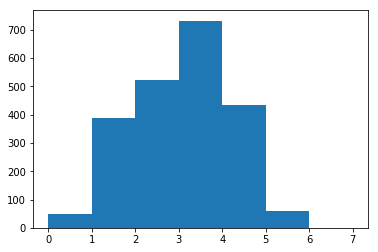

In [10]:
plt.hist(pos_hamming[:,7], bins=7, range=(0,7))

(array([  61.,  175.,  410.,  703.,  638.,  196.,    4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 7 Patch objects>)

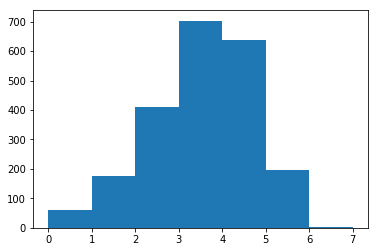

In [11]:
plt.hist(neg_hamming[:,7], bins=7, range=(0,7))

In [13]:
G = nx.DiGraph()
mutations = range(0,7)
for n in mutations:
    edges = Counter(zip(pos_hamming[:,n], pos_hamming[:,n+1]))
    for key, val in edges.items():
        G.add_edge((n, key[0]), (n+1, key[1]), value=val)
    print(edges)

Counter({(0, 0): 2187})
Counter({(0, 0): 2187})
Counter({(0, 1): 972, (0, 0): 810, (0, 2): 405})
Counter({(1, 2): 702, (0, 0): 405, (2, 2): 216, (0, 2): 216, (0, 1): 189, (1, 1): 189, (2, 3): 135, (1, 3): 81, (2, 1): 54})
Counter({(2, 3): 540, (2, 2): 468, (1, 2): 261, (0, 0): 189, (0, 1): 171, (3, 3): 162, (1, 1): 153, (2, 1): 108, (3, 2): 45, (0, 2): 45, (2, 4): 18, (1, 0): 18, (3, 4): 9})
Counter({(2, 2): 402, (3, 3): 396, (2, 3): 360, (3, 4): 288, (1, 1): 258, (1, 2): 165, (0, 1): 111, (0, 0): 90, (2, 1): 54, (4, 3): 27, (3, 2): 18, (1, 0): 9, (0, 2): 6, (2, 4): 3})
Counter({(3, 3): 466, (2, 2): 328, (1, 1): 296, (3, 4): 245, (2, 3): 225, (4, 4): 189, (1, 2): 124, (3, 2): 71, (4, 5): 61, (0, 1): 54, (0, 0): 45, (4, 3): 41, (2, 1): 37, (1, 0): 3, (3, 1): 1, (2, 4): 1})


In [14]:
def make_json(hamming):
    G = nx.DiGraph()
    mutations = range(0,7)
    for n in mutations:
        edges = Counter(zip(hamming[:,n], hamming[:,n+1]))
        for key, val in edges.items():
            G.add_edge((n, key[0]), (n+1, key[1]), value=val)
    return json_graph.node_link_data(G)

In [15]:
make_json(pos_hamming)

{'directed': True,
 'graph': {},
 'links': [{'source': 0, 'target': 15, 'value': 189},
  {'source': 0, 'target': 6, 'value': 41},
  {'source': 0, 'target': 22, 'value': 61},
  {'source': 1, 'target': 10, 'value': 216},
  {'source': 1, 'target': 17, 'value': 54},
  {'source': 1, 'target': 3, 'value': 135},
  {'source': 2, 'target': 12, 'value': 2187},
  {'source': 3, 'target': 7, 'value': 9},
  {'source': 3, 'target': 25, 'value': 45},
  {'source': 3, 'target': 14, 'value': 162},
  {'source': 5, 'target': 10, 'value': 216},
  {'source': 5, 'target': 17, 'value': 189},
  {'source': 5, 'target': 24, 'value': 405},
  {'source': 7, 'target': 20, 'value': 27},
  {'source': 8, 'target': 16, 'value': 45},
  {'source': 8, 'target': 4, 'value': 54},
  {'source': 9, 'target': 15, 'value': 1},
  {'source': 9, 'target': 6, 'value': 225},
  {'source': 9, 'target': 13, 'value': 328},
  {'source': 9, 'target': 4, 'value': 37},
  {'source': 10, 'target': 11, 'value': 108},
  {'source': 10, 'target': 7,

In [16]:
make_json(neg_hamming)

{'directed': True,
 'graph': {},
 'links': [{'source': 0, 'target': 15, 'value': 267},
  {'source': 0, 'target': 6, 'value': 38},
  {'source': 0, 'target': 22, 'value': 163},
  {'source': 1, 'target': 10, 'value': 270},
  {'source': 1, 'target': 17, 'value': 27},
  {'source': 1, 'target': 3, 'value': 351},
  {'source': 2, 'target': 12, 'value': 2187},
  {'source': 3, 'target': 7, 'value': 144},
  {'source': 3, 'target': 26, 'value': 54},
  {'source': 3, 'target': 14, 'value': 261},
  {'source': 5, 'target': 10, 'value': 54},
  {'source': 5, 'target': 17, 'value': 405},
  {'source': 5, 'target': 25, 'value': 351},
  {'source': 7, 'target': 20, 'value': 27},
  {'source': 7, 'target': 0, 'value': 93},
  {'source': 7, 'target': 13, 'value': 42},
  {'source': 8, 'target': 16, 'value': 46},
  {'source': 8, 'target': 4, 'value': 56},
  {'source': 9, 'target': 6, 'value': 269},
  {'source': 9, 'target': 23, 'value': 214},
  {'source': 9, 'target': 4, 'value': 18},
  {'source': 10, 'target': 11